In [1]:
import vcf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import DBSCAN, KMeans
from scipy.cluster.hierarchy import dendrogram, linkage ,fcluster
from collections import Counter
#from sklearn.datasets.samples_generator import make_blobs
from sklearn import preprocessing
from sklearn.metrics.cluster import adjusted_rand_score
import itertools
import random
from scipy.spatial import distance as ssd
from tqdm import tqdm
import scipy
import scipy.sparse 
from scipy.stats import pearsonr
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import kneighbors_graph 
from scipy.sparse.linalg import expm
from scipy.linalg import solve_banded
from scipy.spatial.distance import pdist
import scipy.spatial.distance
import math
from sklearn.metrics.pairwise import euclidean_distances
import sklearn
import os.path
import re
import math
from sklearn.neighbors import kneighbors_graph
from sklearn.linear_model import LassoLars, Lars
from scipy.linalg import eigh
from fsfc.base import KBestFeatureSelector
plt.ion()
plt.show()

# DATA

In [2]:
df = pd.read_csv('C:/Users/Aral/Desktop/毕业论文/数据/SARS-CoV-2 lineage meta data.csv')
df = df.dropna()

In [3]:
target = list(df[(df['lineage']=='AY.12 (Delta-like)')|(df['lineage']=='AY.9 (Delta-like)')|(df['lineage']=='AY.4 (Delta-like)')]['INAB sample ID'])
file_dir = 'C:/Users/Aral/Desktop/毕业论文/数据/clinical_variant_files'
def getFlist(path):
    f = []
    for root, dirs, files in os.walk(file_dir):
        f.append(files)
    return f
file_name = getFlist(file_dir)[0]

pos_record = {}

for i in range(len(file_name)):
    if i != 306:
        t = re.findall(r'V[0-9]*',file_name[i])
        if t[0] in target:
            test = vcf.Reader(filename = 'C:/Users/Aral/Desktop/毕业论文/数据/clinical_variant_files/'+file_name[i])
            for record in test:
                if record.POS not in pos_record:
                    pos_record[record.POS] = 1
                else:
                    pos_record[record.POS] += 1

res = sorted(pos_record.items(),key = lambda item:item[1],reverse=True)
sor_res = {str(k):v for k,v in res}
x = list(sor_res.keys())

sor_res_filter = dict(filter(lambda x: x[1] > 1 ,sor_res.items()))
pos2 = list(sor_res_filter.keys())

In [4]:
df2 = pd.read_csv('C:/Users/Aral/Desktop/毕业论文/数据/SARS-CoV-2 lineage meta data.csv')
df2 = df2.dropna()
target2 = list(df2[(df2['lineage']=='AY.4 (Delta-like)')]['INAB sample ID'])
x2 = []
for i in range(len(file_name)):
    tar = [0]*len(pos2)
    if i != 306:
        t = re.findall(r'V[0-9]*',file_name[i])
        if t[0] in target2:
            test = vcf.Reader(filename = 'C:/Users/Aral/Desktop/毕业论文/数据/clinical_variant_files/'+file_name[i])
            for p in test:
                if str(p.POS) in pos2:
                    if p.ALT[0] == 'A':
                        tar[pos2.index(str(p.POS))] = 1
                    if p.ALT[0] == 'C':
                        tar[pos2.index(str(p.POS))] = 2
                    if p.ALT[0] == 'G':
                        tar[pos2.index(str(p.POS))] = 3
                    if p.ALT[0] == 'T':
                        tar[pos2.index(str(p.POS))] = 4
            x2.append(tar)

AY4_POS2 = pd.DataFrame(x2)
AY4_POS2.columns = pos2
AY4_POS2['Label'] =0

In [5]:
df3 = pd.read_csv('C:/Users/Aral/Desktop/毕业论文/数据/SARS-CoV-2 lineage meta data.csv')
df3 = df3.dropna()
target3 = list(df3[(df3['lineage']=='AY.9 (Delta-like)')]['INAB sample ID'])

x3 = []
for i in range(len(file_name)):
    tar = [0]*len(pos2)
    if i != 306:
        t = re.findall(r'V[0-9]*',file_name[i])
        if t[0] in target3:
            test = vcf.Reader(filename = 'C:/Users/Aral/Desktop/毕业论文/数据/clinical_variant_files/'+file_name[i])
            for p in test:
                if str(p.POS) in pos2:
                    if p.ALT[0] == 'A':
                        tar[pos2.index(str(p.POS))] = 1
                    if p.ALT[0] == 'C':
                        tar[pos2.index(str(p.POS))] = 2
                    if p.ALT[0] == 'G':
                        tar[pos2.index(str(p.POS))] = 3
                    if p.ALT[0] == 'T':
                        tar[pos2.index(str(p.POS))] = 4
            x3.append(tar)

AY9_POS2 = pd.DataFrame(x3)
AY9_POS2.columns = pos2
AY9_POS2['Label'] =1

In [6]:
df = pd.read_csv('C:/Users/Aral/Desktop/毕业论文/数据/SARS-CoV-2 lineage meta data.csv')
df = df.dropna()
target1 = list(df[(df['lineage']=='AY.12 (Delta-like)')]['INAB sample ID'])

x = []
name1 = []
for i in range(len(file_name)):
    tar = [0]*len(pos2)
    if i != 306:
        t = re.findall(r'V[0-9]*',file_name[i])
        if t[0] in target1:
            name1.append(t[0])
            test = vcf.Reader(filename = 'C:/Users/Aral/Desktop/毕业论文/数据/clinical_variant_files/'+file_name[i])
            for p in test:
                if str(p.POS) in pos2:
                    if p.ALT[0] == 'A':
                        tar[pos2.index(str(p.POS))] = 1
                    if p.ALT[0] == 'C':
                        tar[pos2.index(str(p.POS))] = 2
                    if p.ALT[0] == 'G':
                        tar[pos2.index(str(p.POS))] = 3
                    if p.ALT[0] == 'T':
                        tar[pos2.index(str(p.POS))] = 4
            x.append(tar)
            
AY12_POS2 = pd.DataFrame(x)
AY12_POS2.columns = pos2
AY12_POS2['Label'] = 2

In [67]:
b = AY4_POS2.append(AY9_POS2)
fin_data = b.append(AY12_POS2)

fin_data

,23403,28270,28881,14408,3037,22917,16466,22995,26767,28247,...,20055,2258,3569,12056,13701,26625,491,22790,9584,Label
0,3,4,4,4,4,3,4,1,2,1,...,0,0,0,0,0,0,0,0,0,0
1,3,4,4,4,4,3,4,1,2,1,...,0,0,0,0,0,0,0,0,0,0
2,3,4,4,4,4,3,4,1,2,1,...,0,0,0,0,0,0,0,0,0,0
3,3,4,4,4,4,3,4,1,2,1,...,0,0,0,0,0,0,0,0,0,0
4,3,4,4,4,4,3,4,1,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,3,4,4,4,4,3,4,1,2,1,...,0,0,0,0,0,0,0,0,0,2
280,3,4,4,4,4,3,4,1,2,1,...,0,0,0,0,0,0,0,0,0,2
281,3,4,4,4,4,3,4,1,2,1,...,0,0,0,0,0,0,0,0,0,2
282,3,4,4,4,4,3,4,1,2,1,...,0,0,0,0,0,0,0,0,0,2


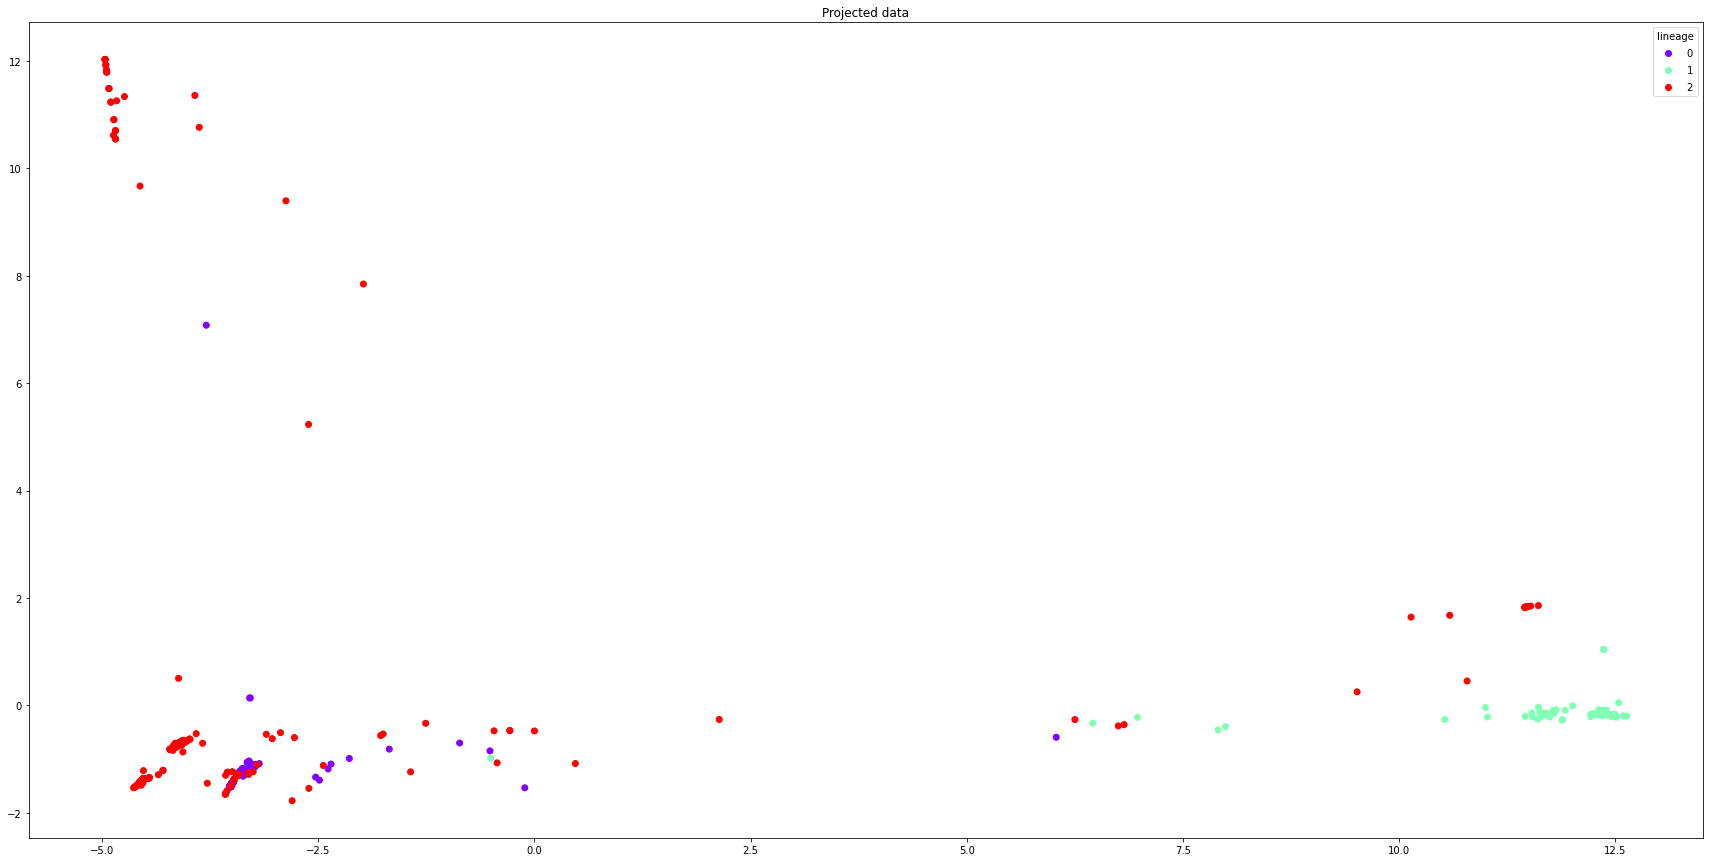

In [8]:
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(fin_data.iloc[:,:-1])

# Project data onto first two principal components
projX = pca.transform(fin_data.iloc[:,:-1])
plt.figure(figsize=(30,15))

scatter = plt.scatter(projX[:,0],projX[:,1],c=fin_data.iloc[:,-1],cmap='rainbow')
plt.legend(handles=scatter.legend_elements()[0],labels = scatter.legend_elements()[1],
           title="lineage")
plt.title('Projected data')
plt.show()

In [112]:
pred = KMeans(n_clusters= 3).fit(np.array(fin_data.iloc[:,:-1])).labels_
print(adjusted_rand_score(np.array(fin_data.iloc[:,-1]), pred))

0.3703263588438124


# Unsupervised feature selection

Laplacian Score

In [113]:
def construct_W(X, neighbour_size = 10, t = 1):
    n_samples, n_features = np.shape(X)
    S=kneighbors_graph(X, neighbour_size+1, mode='distance',metric='euclidean') #sqecludian distance works only with mode=connectivity  results were absurd
    S = (-1*(S*S))/(2*t*t)
    S=S.tocsc()
    S=expm(S) # exponential
    S=S.tocsr()
    #[1]  M. Belkin and P. Niyogi, “Laplacian Eigenmaps and Spectral Techniques for Embedding and Clustering,” Advances in Neural Information Processing Systems,
    #Vol. 14, 2001. Following the paper to make the weights matrix symmetrix we use this method
    bigger = np.transpose(S) > S
    S = S - S.multiply(bigger) + np.transpose(S).multiply(bigger)
    return S

def LaplacianScore(X, neighbour_size = 10,  t = 1):
    W = construct_W(X,t=t,neighbour_size=neighbour_size)
    n_samples, n_features = np.shape(X)
    
    #construct the diagonal matrix
    D=np.array(W.sum(axis=1))
    D = scipy.sparse.diags(np.transpose(D), [0])
    #construct graph Laplacian L
    L=D-W.toarray()

    #construct 1= [1,···,1]' 
    I=np.ones((n_samples,n_features))

    #construct fr' => fr= [fr1,...,frn]'
    Xt = np.transpose(X)

    #construct fr^=fr-(frt D I/It D I)I
    t=np.matmul(np.matmul(Xt,D.toarray()),I)/np.matmul(np.matmul(np.transpose(I),D.toarray()),I)
    t=t[:,0]
    t=np.tile(t,(n_samples,1))
    fr=X-t

    #Compute Laplacian Score
    fr_t=np.transpose(fr)
    Lr=np.matmul(np.matmul(fr_t,L),fr)/np.matmul(np.dot(fr_t,D.toarray()),fr)

    return np.diag(Lr)



C:\Users\Aral\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\Aral\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide


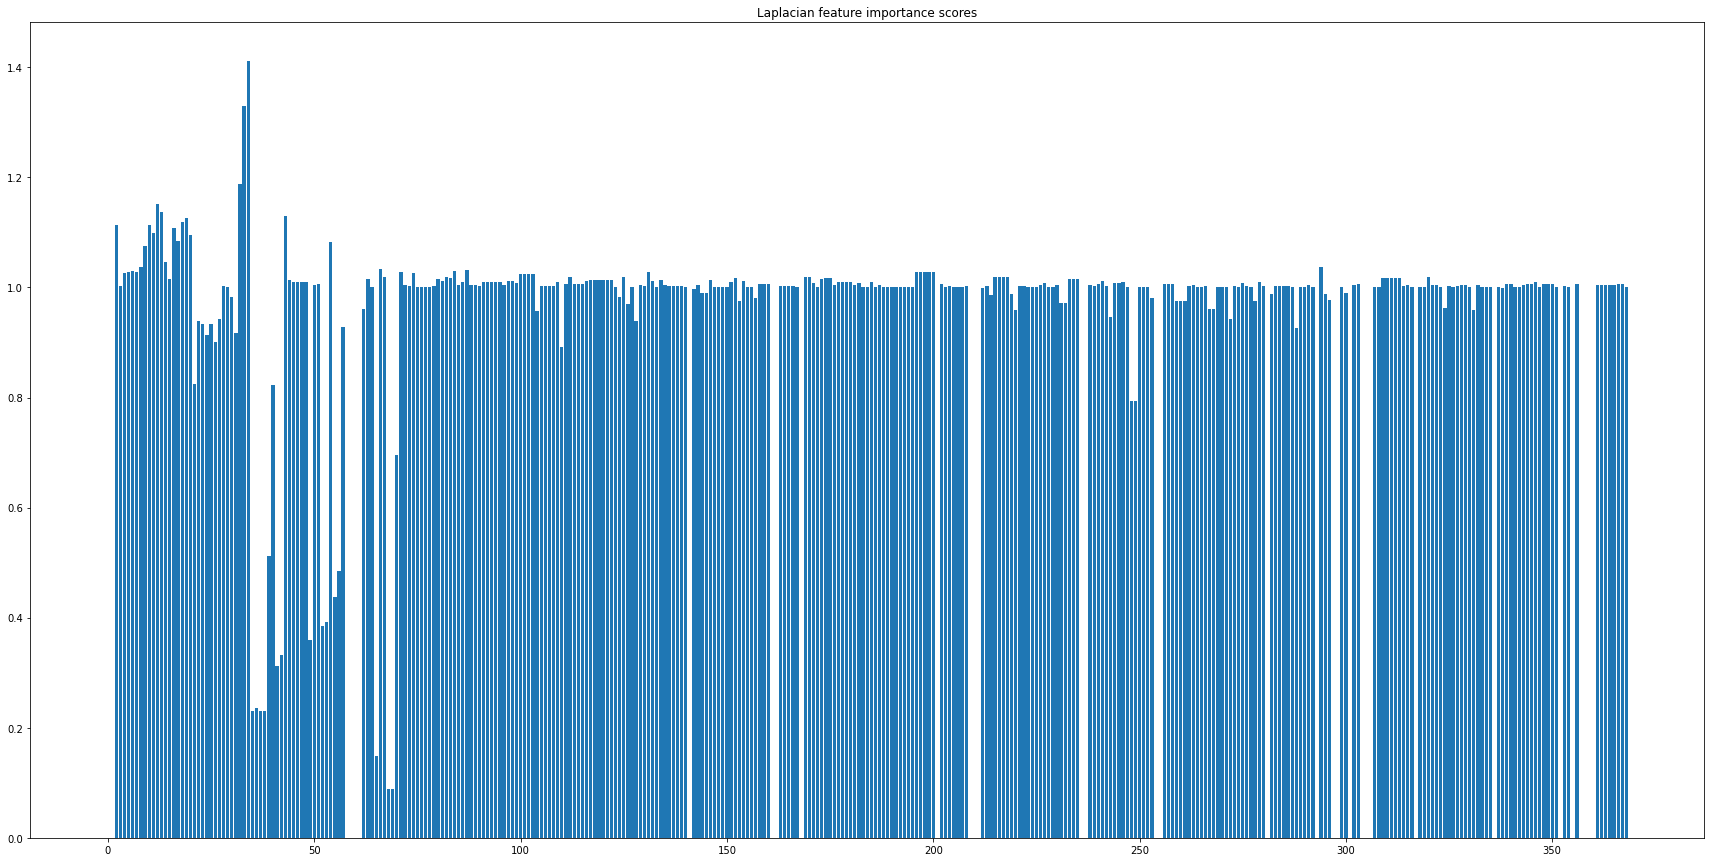

In [114]:
ls =LaplacianScore(np.array(fin_data.iloc[:,:-1]))
plt.figure(figsize=(30,15))
plt.title('Laplacian feature importance scores')
plt.bar(np.arange(np.array(fin_data.iloc[:,:-1]).shape[1]),ls);

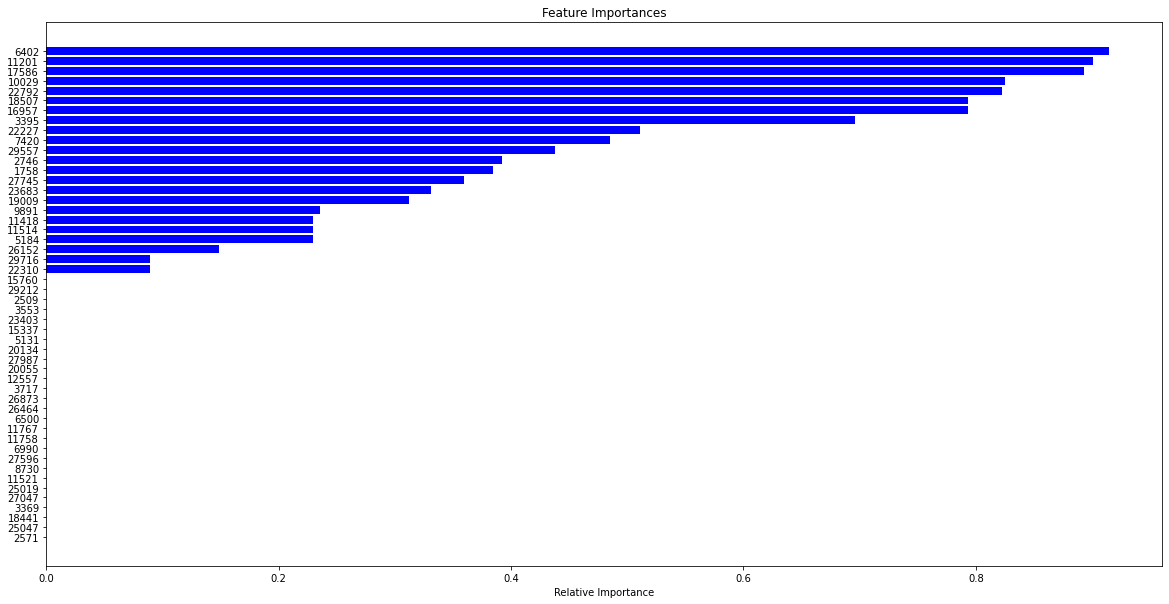

In [140]:
indices = np.argsort(ls)[:50]  # top 30 features
plt.figure(figsize=(20,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)),ls[indices], color='b', align='center')
plt.yticks(range(len(indices)), [fin_data.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

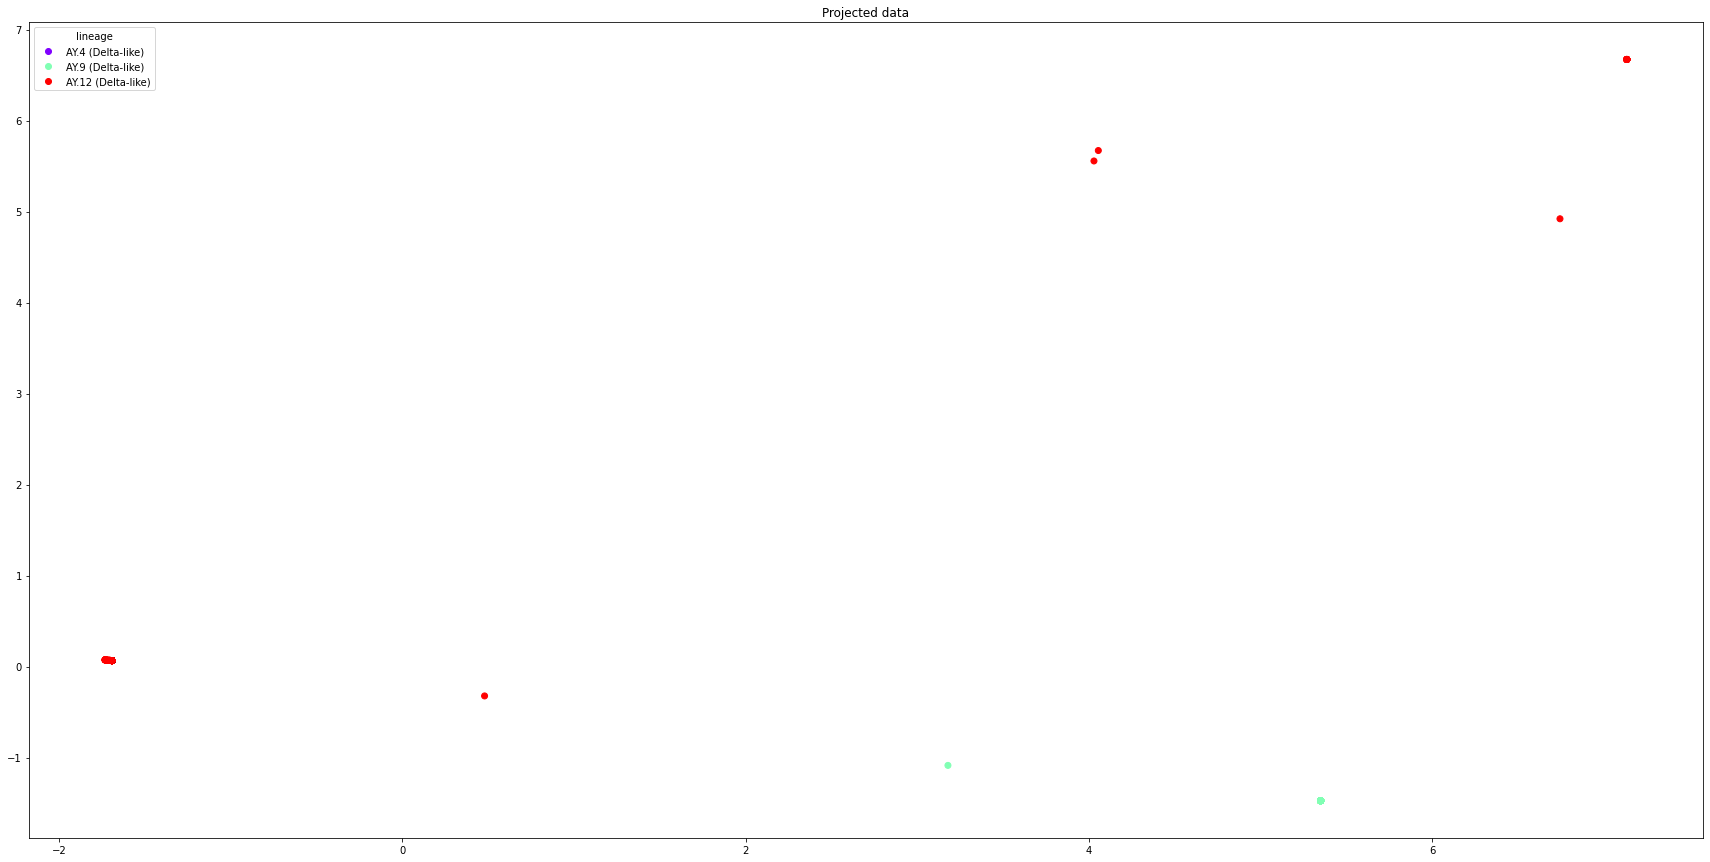

In [172]:
fea_name = []
sel_fea = list(np.where(ls< 0.3)[0])
for i in range(len(list(fin_data.columns))):
    if i in sel_fea:
        fea_name.append(list(fin_data.columns)[i])
sel_data = fin_data[fea_name]

import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(sel_data)

# Project data onto first two principal components
projX = pca.transform(sel_data)
plt.figure(figsize=(30,15))

scatter = plt.scatter(projX[:,0],projX[:,1],c=fin_data.iloc[:,-1],cmap='rainbow')
plt.legend(handles=scatter.legend_elements()[0],labels = ['AY.4 (Delta-like)','AY.9 (Delta-like)','AY.12 (Delta-like)'],
           title="lineage")
plt.title('Projected data')
plt.show()

In [173]:
fea_name

['23403',
 '5184',
 '9891',
 '11418',
 '11514',
 '2509',
 '3553',
 '15760',
 '29212',
 '26152',
 '22310',
 '29716',
 '2571',
 '6500',
 '15337',
 '25047',
 '5131',
 '20134',
 '27987',
 '26464',
 '26873',
 '6990',
 '11758',
 '11767',
 '8730',
 '25019',
 '27047',
 '27596',
 '3717',
 '11521',
 '18441',
 '3369',
 '12557',
 '20055']

In [176]:
sl = ['10029',
 '11332',
 '8986',
 '6402',
 '9053',
 '11201',
 '27874',
 '4181',
 '28916',
 '7124',
 '19220',
 '1048',
 '613',
 '9891',
 '5184',
 '11514',
 '11418',
 '22227',
 '22792',
 '19009']

In [178]:
for i in fea_name:
    if i in sl:
        print(i)

5184
9891
11418
11514


In [175]:
pred = KMeans(n_clusters= 3).fit(np.array(fin_data.iloc[:,:-1])[:,list(np.where( ls < 0.3)[0])]).labels_
print(adjusted_rand_score(np.array(fin_data.iloc[:,-1]), pred))

0.47762090585730516


MCFS

In [9]:
from fsfc.generic import MCFS
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans

pipeline = Pipeline([
    ('select', MCFS(30,3)),
    ('cluster', KMeans())
])
pipeline.fit_predict(np.array(fin_data.iloc[:,:-1]))

C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:138: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:660: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 33 iterations, i.e. alpha=6.750e-05, with an active set of 27 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps 

C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:660: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 353 iterations, i.e. alpha=8.450e-03, with an active set of 248 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning,
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:660: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 353 iterations, i.e. alpha=8.436e-03, with an active set of 248 regressors, and the smallest cholesky pivot element being 6.053e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning,
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:660: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 353 iterations, i.e. alpha=8.433e-03, with an active set of 248 regressors, and the smallest ch

C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:660: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 343 iterations, i.e. alpha=5.130e+13, with an active set of 255 regressors, and the smallest cholesky pivot element being 3.650e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning,
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:660: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 343 iterations, i.e. alpha=4.926e+13, with an active set of 255 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning,
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:660: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 343 iterations, i.e. alpha=4.818e+13, with an active set of 255 regressors, and the smallest ch

C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:660: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 346 iterations, i.e. alpha=1.382e+03, with an active set of 244 regressors, and the smallest cholesky pivot element being 2.356e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning,
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:660: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 352 iterations, i.e. alpha=1.015e+03, with an active set of 249 regressors, and the smallest cholesky pivot element being 2.107e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning,
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:660: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 352 iterations, i.e. alpha=1.014e+03, with an active set of 249 regressors, and the smallest ch

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0,
       0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 5, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 5, 0, 0, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 3, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 7, 0, 4, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 3, 5, 0, 0, 0, 0, 1,
       0, 0, 0, 6, 7, 0, 0, 6, 6, 0, 0, 0, 7, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [57]:
fin_data.iloc[:,:-1]

,23403,28270,28881,14408,3037,22917,16466,22995,26767,28247,...,12557,20055,2258,3569,12056,13701,26625,491,22790,9584
0,3,4,4,4,4,3,4,1,2,1,...,0,0,0,0,0,0,0,0,0,0
1,3,4,4,4,4,3,4,1,2,1,...,0,0,0,0,0,0,0,0,0,0
2,3,4,4,4,4,3,4,1,2,1,...,0,0,0,0,0,0,0,0,0,0
3,3,4,4,4,4,3,4,1,2,1,...,0,0,0,0,0,0,0,0,0,0
4,3,4,4,4,4,3,4,1,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,3,4,4,4,4,3,4,1,2,1,...,0,0,0,0,0,0,0,0,0,0
280,3,4,4,4,4,3,4,1,2,1,...,0,0,0,0,0,0,0,0,0,0
281,3,4,4,4,4,3,4,1,2,1,...,0,0,0,0,0,0,0,0,0,0
282,3,4,4,4,4,3,4,1,2,1,...,0,0,0,0,0,0,0,0,0,0


In [52]:
x = np.array(fin_data.iloc[:,:-1])
clusters = 3
p=10
sigma=2
mode='default'
alpha=0.001

def create_regressor(mode,alpha):
    if mode == 'default':
        return Lars()
    if mode == 'lasso':
        return LassoLars(alpha=alpha)
    raise ValueError('Unexpected mode ' + mode + '. Expected "default" or "lasso"')

graph = kneighbors_graph(
            x,
            n_neighbors=p,
        )
        # Construct the heat matrix
w = np.zeros([x.shape[0], x.shape[0]])
rows, cols = graph.nonzero()
for i, j in zip(rows, cols):
    w[i, j] = math.exp(-np.linalg.norm(x[i] - x[j])**2/sigma)

# Compute degree and Laplacian matrices
degree_vector = np.sum(w, 1)
degree = np.diag(degree_vector)
laplacian = degree - w

# Solve the eigen-problem
values, vectors = eigh(laplacian, degree)
smallest = vectors[:, 0:clusters].T

# Find coefficients for each cluster
coefs = []
for i in range(clusters):
    this_coefs = create_regressor(mode,alpha).fit(x, smallest[i]).coef_
    coefs.append(this_coefs)
coefs = np.array(coefs)

# Compute MCFS-scores
scores = np.max(coefs, 0)

C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:138: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:660: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 11 iterations, i.e. alpha=5.384e-05, with an active set of 11 regressors, and the smallest cholesky pivot element being 1.054e-08. Reduce max_iter or increase eps 

C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:660: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 66 iterations, i.e. alpha=9.143e-06, with an active set of 66 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  ConvergenceWarning,
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:660: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 66 iterations, i.e. alpha=9.143e-06, with an active set of 66 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning,
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:660: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 66 iterations, i.e. alpha=9.011e-06, with an active set of 66 regressors, and the smallest cholesky

C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:660: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 268 iterations, i.e. alpha=2.317e-03, with an active set of 212 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning,
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:660: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 329 iterations, i.e. alpha=6.506e+00, with an active set of 238 regressors, and the smallest cholesky pivot element being 7.146e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning,
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:660: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 335 iterations, i.e. alpha=5.858e+00, with an active set of 242 regressors, and the smallest ch

C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:660: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 135 iterations, i.e. alpha=9.528e-05, with an active set of 112 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  ConvergenceWarning,
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:660: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 136 iterations, i.e. alpha=9.492e-05, with an active set of 113 regressors, and the smallest cholesky pivot element being 1.054e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning,
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:660: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 138 iterations, i.e. alpha=9.448e-05, with an active set of 115 regressors, and the smallest ch

C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:660: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 72 iterations, i.e. alpha=9.809e-06, with an active set of 57 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  ConvergenceWarning,
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:660: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 73 iterations, i.e. alpha=9.656e-06, with an active set of 58 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning,
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:660: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 74 iterations, i.e. alpha=9.655e-06, with an active set of 59 regressors, and the smallest cholesky

C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:660: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 394 iterations, i.e. alpha=6.837e-02, with an active set of 230 regressors, and the smallest cholesky pivot element being 2.107e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning,
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:660: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 394 iterations, i.e. alpha=6.726e-02, with an active set of 230 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning,
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:660: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 394 iterations, i.e. alpha=6.720e-02, with an active set of 230 regressors, and the smallest ch

In [53]:
pd.Series(scores).sort_values()

8     -1.552329e+05
142   -9.637497e+04
6     -7.058406e+04
26    -5.759574e+04
11    -5.072211e+04
           ...     
333    9.113302e+16
84     1.837361e+17
163    3.063291e+17
109    1.162396e+18
273    2.324793e+18
Length: 369, dtype: float64

In [58]:
def_mutations = [22028,22029.22030,23402,23403,23404,28143,28144,28145,25468,25469,25470,23603,23604,23605,14381,14382,14383,26766,26767,26768,16439,16440,
16441,28880,28881,28882,21617,21618,21619,29402,29403,29404,15425,15426,15427,22994,22995,22996,28460,28461,28462,22916,22917,22918,24410,
24411,24412,27751,27752,27753,27637,27638,27639,10028,10029,10030,11201,11202,11203,19193,19194,19195,4181,4182,4183,9053,9054,9055,28916,
28917,28918,27873,27874,27875,6401,6402,6403,7124,7125,7126]


fea_name = []
sel_fea = list(pd.Series(scores).sort_values( ascending=False).index[:])
for i in sel_fea:
    fea_name.append(list(fin_data.iloc[:,:-1].columns)[i])
rank_def = []
sel_def = []
for i in range(len(fea_name)):
    if int(fea_name[i]) in def_mutations:
        rank_def.append(i)
        sel_def.append(fea_name[i])
rank_def

[31,
 47,
 49,
 50,
 51,
 58,
 65,
 86,
 121,
 133,
 151,
 295,
 328,
 343,
 346,
 347,
 353,
 356,
 363,
 364,
 365,
 368]

In [66]:
'28145'in list(fin_data.iloc[:,:-1].columns)

False

In [59]:
sel_def

['22995',
 '28881',
 '22917',
 '9053',
 '27874',
 '23604',
 '27638',
 '25469',
 '29402',
 '7124',
 '22028',
 '23403',
 '28461',
 '24410',
 '6402',
 '28916',
 '4181',
 '21618',
 '10029',
 '27752',
 '11201',
 '26767']

In [179]:
fea_name = []
sel_fea = list(pd.Series(scores).sort_values().index[:10])
for i in range(len(list(fin_data.columns))):
    if i in sel_fea:
        fea_name.append(list(fin_data.columns)[i])
sel_data = fin_data[fea_name]

In [182]:
fea_name
for i in fea_name:
    if i in sl:
        print(i)

10029
11201
22792


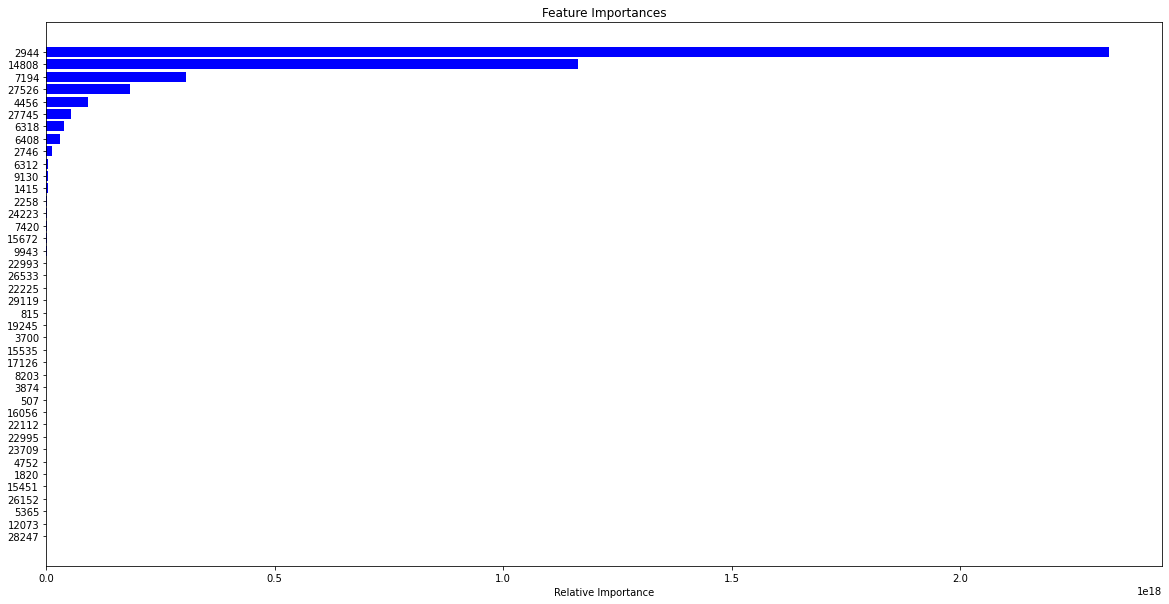

In [25]:
indices = np.argsort(scores)[-0:]  # top 30 features
plt.figure(figsize=(20,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)),scores[indices], color='b', align='center')
plt.yticks(range(len(indices)), [fin_data.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

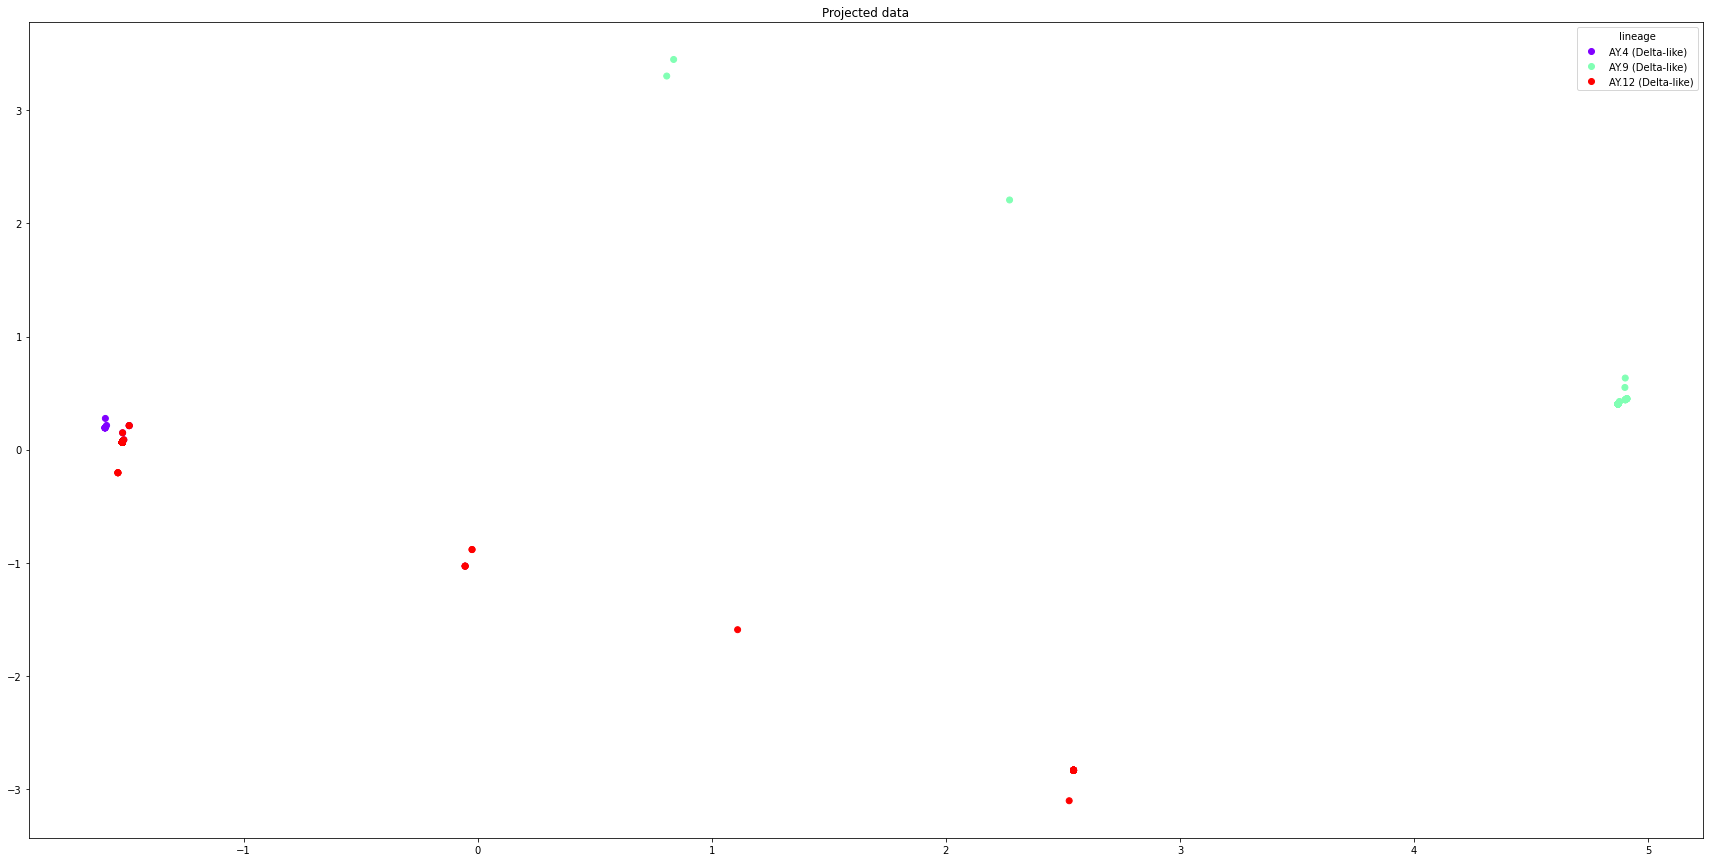

In [180]:
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(sel_data)

# Project data onto first two principal components
projX = pca.transform(sel_data)
plt.figure(figsize=(30,15))

scatter = plt.scatter(projX[:,0],projX[:,1],c=fin_data.iloc[:,-1],cmap='rainbow')
plt.legend(handles=scatter.legend_elements()[0],labels = ['AY.4 (Delta-like)','AY.9 (Delta-like)','AY.12 (Delta-like)'],
           title="lineage")
plt.title('Projected data')
plt.show()

In [169]:
from sklearn.metrics import adjusted_rand_score
from sklearn.cluster import KMeans

kmeans=KMeans(n_clusters=3,random_state=123).fit(sel_data.iloc[:,:-1])
ari=adjusted_rand_score(fin_data.iloc[:,-1], kmeans.labels_)  
print('ARI：%f'%(ari))

ARI：0.493544


B.1.1.7

In [33]:
df = pd.read_csv('C:/Users/Aral/Desktop/毕业论文/数据/SARS-CoV-2 lineage meta data.csv')
df = df.dropna()

file_dir = 'C:/Users/Aral/Desktop/毕业论文/数据/clinical_variant_files'
def getFlist(path):
    f = []
    for root, dirs, files in os.walk(file_dir):
        f.append(files)
    return f
file_name = getFlist(file_dir)[0]

pos_record = {}
target2 = list(df[df['lineage']=='B.1.1.7']['INAB sample ID'])
for i in range(len(file_name)):
    if i != 306:
        t = re.findall(r'V[0-9]*',file_name[i])
        if t[0] in target2:
            test = vcf.Reader(filename = 'C:/Users/Aral/Desktop/毕业论文/数据/clinical_variant_files/'+file_name[i])
            for record in test:
                if record.POS not in pos_record:
                    pos_record[record.POS] = 1
                else:
                    pos_record[record.POS] += 1

res = sorted(pos_record.items(),key = lambda item:item[1],reverse=True)
sor_res = {str(k):v for k,v in res}

In [34]:
sor_res_filter = dict(filter(lambda x: x[1] >= 2,sor_res.items()))
pos3 = list(sor_res_filter.keys())
df2 = pd.read_csv('C:/Users/Aral/Desktop/毕业论文/数据/SARS-CoV-2 lineage meta data.csv')
df2 = df2.dropna()

x2 = []
for i in range(len(file_name)):
    tar = [0]*len(pos3)
    if i != 306:
        t = re.findall(r'V[0-9]*',file_name[i])
        if t[0] in target2:
            test = vcf.Reader(filename = 'C:/Users/Aral/Desktop/毕业论文/数据/clinical_variant_files/'+file_name[i])
            for p in test:
                if str(p.POS) in pos3:
                    if p.ALT[0] == 'A':
                        tar[pos3.index(str(p.POS))] = 1
                    if p.ALT[0] == 'C':
                        tar[pos3.index(str(p.POS))] = 2
                    if p.ALT[0] == 'G':
                        tar[pos3.index(str(p.POS))] = 3
                    if p.ALT[0] == 'T':
                        tar[pos3.index(str(p.POS))] = 4
            x2.append(tar)

B117_test = pd.DataFrame(x2)
B117_test.columns = pos3
B117_test

,14408,23063,24914,21990,16176,3037,5388,23403,28270,11287,...,8240,12374,27987,29440,6706,10646,27261,1839,26158,28665
0,4,4,2,4,2,4,1,3,4,3,...,0,0,0,0,0,0,0,0,0,0
1,4,4,2,4,2,4,1,3,4,3,...,0,0,0,0,0,0,0,0,0,0
2,4,4,2,4,2,4,1,3,4,3,...,0,0,0,0,0,0,0,0,0,0
3,4,4,2,4,2,4,1,3,4,3,...,0,0,0,0,0,0,0,0,0,0
4,4,4,2,4,2,4,1,3,4,3,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1272,4,4,2,4,2,4,1,3,4,3,...,0,0,0,0,0,0,0,0,0,0
1273,4,4,2,4,2,4,1,3,4,3,...,0,0,0,0,0,0,0,0,0,0
1274,4,4,2,4,2,4,1,3,4,3,...,0,0,0,0,0,0,0,0,3,0
1275,4,4,2,4,2,4,1,3,4,3,...,0,0,0,0,0,0,0,0,0,0


In [35]:
from fsfc.generic import MCFS
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans

pipeline = Pipeline([
    ('select', MCFS(30,3)),
    ('cluster', KMeans())
])
pipeline.fit_predict(np.array(B117_test.iloc[:,:]))

C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:138: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:660: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 38 iterations, i.e. alpha=2.083e+12, with an active set of 34 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps 

C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:660: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 202 iterations, i.e. alpha=5.445e+11, with an active set of 183 regressors, and the smallest cholesky pivot element being 2.107e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning,
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:660: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 211 iterations, i.e. alpha=5.209e+11, with an active set of 191 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning,
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:660: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 211 iterations, i.e. alpha=5.207e+11, with an active set of 191 regressors, and the smallest ch

C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:660: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 363 iterations, i.e. alpha=5.351e+11, with an active set of 314 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  ConvergenceWarning,
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:660: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 366 iterations, i.e. alpha=5.339e+11, with an active set of 317 regressors, and the smallest cholesky pivot element being 2.980e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning,
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:660: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 366 iterations, i.e. alpha=5.339e+11, with an active set of 317 regressors, and the smallest ch

C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:138: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:660: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 49 iterations, i.e. alpha=1.097e+05, with an active set of 47 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps 

C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:660: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 319 iterations, i.e. alpha=1.617e+05, with an active set of 267 regressors, and the smallest cholesky pivot element being 2.107e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning,
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:660: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 339 iterations, i.e. alpha=1.573e+05, with an active set of 283 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning,
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:660: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 345 iterations, i.e. alpha=1.537e+05, with an active set of 287 regressors, and the smallest ch

C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:660: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 492 iterations, i.e. alpha=1.028e+05, with an active set of 413 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning,
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:660: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 492 iterations, i.e. alpha=1.019e+05, with an active set of 413 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning,
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:660: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 492 iterations, i.e. alpha=1.016e+05, with an active set of 413 regressors, and the smallest ch

C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:660: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 163 iterations, i.e. alpha=3.526e-07, with an active set of 154 regressors, and the smallest cholesky pivot element being 2.107e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning,
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:660: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 163 iterations, i.e. alpha=3.506e-07, with an active set of 154 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning,
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:660: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 169 iterations, i.e. alpha=3.421e-07, with an active set of 160 regressors, and the smallest ch

C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:660: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 359 iterations, i.e. alpha=1.696e-07, with an active set of 328 regressors, and the smallest cholesky pivot element being 6.409e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning,
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:660: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 359 iterations, i.e. alpha=1.696e-07, with an active set of 328 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning,
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:660: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 360 iterations, i.e. alpha=1.683e-07, with an active set of 329 regressors, and the smallest ch

C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:660: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 445 iterations, i.e. alpha=1.209e-07, with an active set of 397 regressors, and the smallest cholesky pivot element being 2.581e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning,
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:660: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 445 iterations, i.e. alpha=1.205e-07, with an active set of 397 regressors, and the smallest cholesky pivot element being 6.664e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning,
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:660: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 445 iterations, i.e. alpha=1.203e-07, with an active set of 397 regressors, and the smallest ch

array([0, 0, 0, ..., 7, 0, 0])

In [36]:
import numpy as np
import math
from sklearn.neighbors import kneighbors_graph
from sklearn.linear_model import LassoLars, Lars
from scipy.linalg import eigh
from fsfc.base import KBestFeatureSelector

x = np.array(B117_test.iloc[:,:])
clusters = 1
p=8
sigma=1
mode='default'
alpha=0.01

def create_regressor(mode,alpha):
    if mode == 'default':
        return Lars()
    if mode == 'lasso':
        return LassoLars(alpha=alpha)
    raise ValueError('Unexpected mode ' + mode + '. Expected "default" or "lasso"')

graph = kneighbors_graph(
            x,
            n_neighbors=p,
        )
        # Construct the heat matrix
w = np.zeros([x.shape[0], x.shape[0]])
rows, cols = graph.nonzero()
for i, j in zip(rows, cols):
    w[i, j] = math.exp(-np.linalg.norm(x[i] - x[j])**2/sigma)

# Compute degree and Laplacian matrices
degree_vector = np.sum(w, 1)
degree = np.diag(degree_vector)
laplacian = degree - w

# Solve the eigen-problem
values, vectors = eigh(laplacian, degree)
smallest = vectors[:, 0:clusters].T

# Find coefficients for each cluster
coefs = []
for i in range(clusters):
    this_coefs = create_regressor(mode,alpha).fit(x, smallest[i]).coef_
    coefs.append(this_coefs)
coefs = np.array(coefs)

# Compute MCFS-scores
scores = np.max(coefs, 0)

C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:138: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:660: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 38 iterations, i.e. alpha=2.083e+12, with an active set of 34 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps 

C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:660: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 221 iterations, i.e. alpha=5.021e+11, with an active set of 199 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  ConvergenceWarning,
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:660: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 238 iterations, i.e. alpha=4.978e+11, with an active set of 213 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning,
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:660: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 238 iterations, i.e. alpha=4.978e+11, with an active set of 213 regressors, and the smallest ch

C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:660: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 366 iterations, i.e. alpha=5.339e+11, with an active set of 317 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning,
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:660: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 366 iterations, i.e. alpha=5.243e+11, with an active set of 317 regressors, and the smallest cholesky pivot element being 2.107e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning,
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:660: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 370 iterations, i.e. alpha=5.158e+11, with an active set of 321 regressors, and the smallest ch

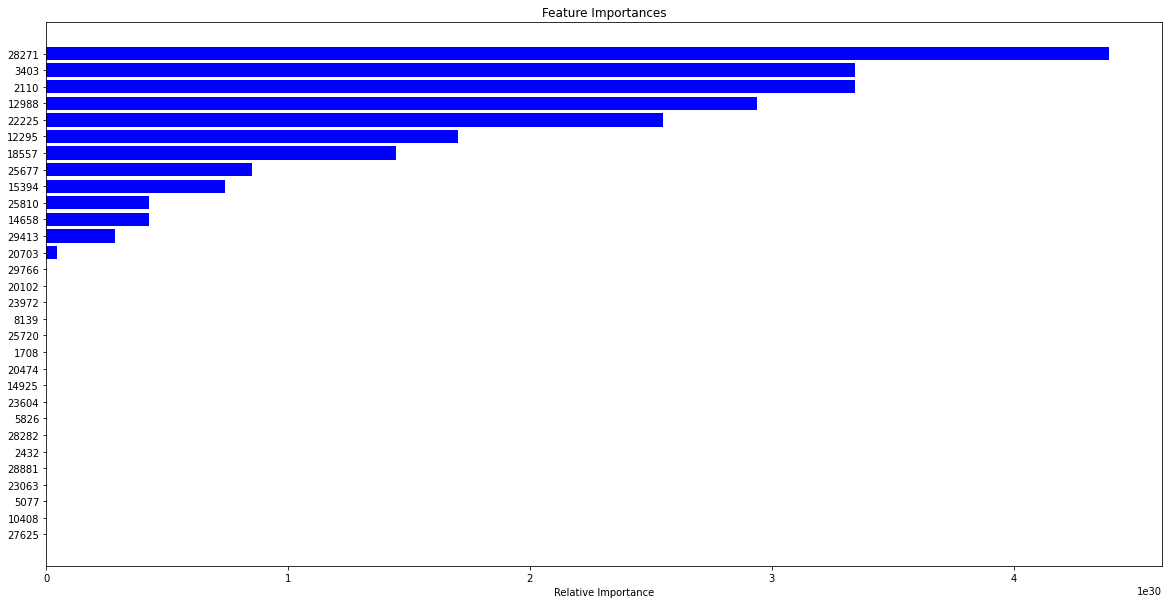

In [40]:
indices = np.argsort(scores)[-30:]  # top 20 features
plt.figure(figsize=(20,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)),scores[indices], color='b', align='center')
plt.yticks(range(len(indices)), [B117_test.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [38]:
def_mutations = [3267,5388,6954,11288,11289,11290,11291,11292,11293,11294,11295,11296,
                21765,21766,21767,21768,21769,21770,21991,21992,21993,23063,23271,23604
                ,23709,24506,24914,27972,28048,28111,28280,28977]

fea_name = []
sel_fea = list(pd.Series(scores).sort_values(ascending=False).index[:])
for i in sel_fea:
    fea_name.append(list(B117_test.columns)[i])
rank_def = []
sel_def = []
for i in range(len(fea_name)):
    if int(fea_name[i]) in def_mutations:
        rank_def.append(i)
        sel_def.append(fea_name[i])
rank_def

[21, 26, 39, 46, 188, 221, 571, 685, 689, 727, 735, 749, 754, 755, 762, 777]

In [39]:
len(sel_def)

['23604',
 '23063',
 '28111',
 '28977',
 '6954',
 '27972',
 '28280',
 '28048',
 '3267',
 '24506',
 '24914',
 '21765',
 '21769',
 '23271',
 '23709',
 '5388']

In [52]:
B117_SEL = np.array(B117_test.iloc[:,:])[:,list(np.where( scores > 3.0e+17)[0])]
Kmeans = KMeans(n_clusters=1)
Kmeans.fit(B117_SEL)
Kmeans.inertia_

C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  "KMeans is known to have a memory leak on Windows "


18909.599060297598

In [51]:
len(list(np.where( scores > 3.0e+17)[0]))

108

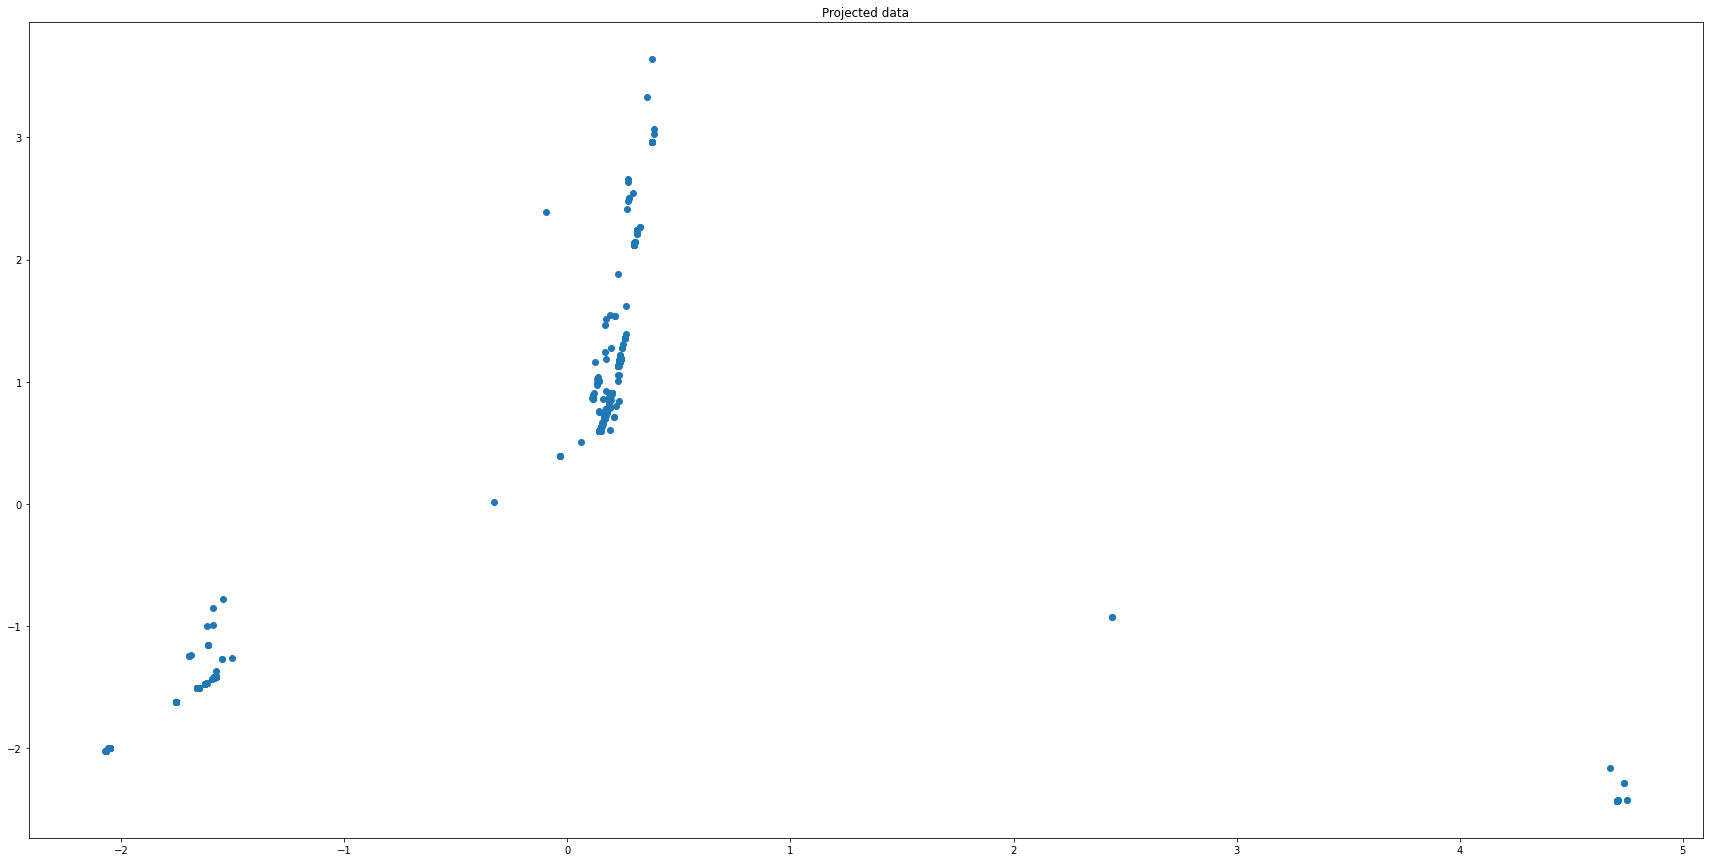

In [53]:
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(B117_SEL[:,:-1])

# Project data onto first two principal components
projX = pca.transform(B117_SEL[:,:-1])
plt.figure(figsize=(30,15))

scatter = plt.scatter(projX[:,0],projX[:,1],cmap='rainbow')

plt.title('Projected data')
plt.show()

In [25]:
def construct_W(X, neighbour_size = 5, t = 1):
    n_samples, n_features = np.shape(X)
    S=kneighbors_graph(X, neighbour_size+1, mode='distance',metric='euclidean') #sqecludian distance works only with mode=connectivity  results were absurd
    S = (-1*(S*S))/(2*t*t)
    S=S.tocsc()
    S=expm(S) # exponential
    S=S.tocsr()
    #[1]  M. Belkin and P. Niyogi, “Laplacian Eigenmaps and Spectral Techniques for Embedding and Clustering,” Advances in Neural Information Processing Systems,
    #Vol. 14, 2001. Following the paper to make the weights matrix symmetrix we use this method
    bigger = np.transpose(S) > S
    S = S - S.multiply(bigger) + np.transpose(S).multiply(bigger)
    return S

def LaplacianScore(X, neighbour_size = 5,  t = 1):
    W = construct_W(X,t=t,neighbour_size=neighbour_size)
    n_samples, n_features = np.shape(X)
    
    #construct the diagonal matrix
    D=np.array(W.sum(axis=1))
    D = scipy.sparse.diags(np.transpose(D), [0])
    #construct graph Laplacian L
    L=D-W.toarray()

    #construct 1= [1,···,1]' 
    I=np.ones((n_samples,n_features))

    #construct fr' => fr= [fr1,...,frn]'
    Xt = np.transpose(X)

    #construct fr^=fr-(frt D I/It D I)I
    t=np.matmul(np.matmul(Xt,D.toarray()),I)/np.matmul(np.matmul(np.transpose(I),D.toarray()),I)
    t=t[:,0]
    t=np.tile(t,(n_samples,1))
    fr=X-t

    #Compute Laplacian Score
    fr_t=np.transpose(fr)
    Lr=np.matmul(np.matmul(fr_t,L),fr)/np.matmul(np.dot(fr_t,D.toarray()),fr)

    return np.diag(Lr)


In [13]:
ls =LaplacianScore(np.array(B117_test.iloc[:,:]))
B117_SEL = np.array(B117_test.iloc[:,:])[:,list(np.where( ls < 0.001)[0])]
B117_score = {}
for i in range(len(B117_test.columns)):
    
    if str(list(ls)[i]) != 'nan':
        B117_score[list(B117_test.columns)[i]] = list(ls)[i]
res = sorted(B117_score.items(),key = lambda item:item[1],reverse=False)
sor_res = {str(k):v for k,v in res}
sor_res

C:\Users\Aral\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide


{'21624': -36.98079447927042,
 '18618': -13.915974035416486,
 '26469': -7.624204791064094,
 '7684': -0.0011285442952700178,
 '25818': -0.0005040112798038117,
 '28027': -2.335747606367861e-06,
 '29253': -1.470969511842295e-06,
 '17019': -4.005329642460948e-08,
 '6813': -8.639478195447213e-11,
 '7675': -8.639478195447213e-11,
 '23757': -8.639478195447213e-11,
 '23429': -1.290672262830668e-12,
 '8453': -9.813082824909354e-17,
 '27059': -4.0788845847758146e-17,
 '28657': -2.2854404062265795e-17,
 '3706': -1.1327753595845307e-17,
 '3178': -9.548330214782075e-18,
 '346': -7.982336490566984e-18,
 '16954': -7.982336490566984e-18,
 '16182': -1.761713483296737e-18,
 '2272': -2.192612418339175e-21,
 '3728': -2.192612418339175e-21,
 '17502': -2.192612418339175e-21,
 '18384': -2.192612418339175e-21,
 '23084': -2.192612418339175e-21,
 '27754': -2.192612418339175e-21,
 '15046': -1.1322713227946076e-21,
 '25481': -1.034275275954654e-21,
 '10702': -1.0046404814295688e-21,
 '5175': -5.171325219653559e-2

In [19]:
def_mutations = [3267,5388,6954,11288,11289,11290,11291,11292,11293,11294,11295,11296,
                21765,21766,21767,21768,21769,21770,21991,21992,21993,23063,23271,23604
                ,23709,24506,24914,27972,28048,28111,28280,28977]

rank_def = []
sel_def = []
for i in range(len(list(sor_res.keys()))):
    if int(list(sor_res.keys())[i]) in def_mutations:
        rank_def.append(i)
        sel_def.append(list(sor_res.keys())[i])
rank_def

[109,
 251,
 495,
 720,
 752,
 758,
 759,
 762,
 763,
 767,
 773,
 776,
 781,
 784,
 785,
 788]

In [20]:
sel_def

['21765',
 '21769',
 '23604',
 '24914',
 '23709',
 '27972',
 '28048',
 '28111',
 '23063',
 '5388',
 '23271',
 '28977',
 '28280',
 '3267',
 '24506',
 '6954']

B.1.617.2

In [41]:
df = pd.read_csv('C:/Users/Aral/Desktop/毕业论文/数据/SARS-CoV-2 lineage meta data.csv')
df = df.dropna()

file_dir = 'C:/Users/Aral/Desktop/毕业论文/数据/clinical_variant_files'
def getFlist(path):
    f = []
    for root, dirs, files in os.walk(file_dir):
        f.append(files)
    return f
file_name = getFlist(file_dir)[0]

pos_record = {}
target2 = list(df[df['lineage']=='B.1.617.2']['INAB sample ID'])
for i in range(len(file_name)):
    if i != 306:
        t = re.findall(r'V[0-9]*',file_name[i])
        if t[0] in target2:
            test = vcf.Reader(filename = 'C:/Users/Aral/Desktop/毕业论文/数据/clinical_variant_files/'+file_name[i])
            for record in test:
                if record.POS not in pos_record:
                    pos_record[record.POS] = 1
                else:
                    pos_record[record.POS] += 1

res = sorted(pos_record.items(),key = lambda item:item[1],reverse=True)
sor_res = {str(k):v for k,v in res}

In [42]:
sor_res_filter = dict(filter(lambda x: x[1] >= 2,sor_res.items()))
pos3 = list(sor_res_filter.keys())
df2 = pd.read_csv('C:/Users/Aral/Desktop/毕业论文/数据/SARS-CoV-2 lineage meta data.csv')
df2 = df2.dropna()

x2 = []
for i in range(len(file_name)):
    tar = [0]*len(pos3)
    if i != 306:
        t = re.findall(r'V[0-9]*',file_name[i])
        if t[0] in target2:
            test = vcf.Reader(filename = 'C:/Users/Aral/Desktop/毕业论文/数据/clinical_variant_files/'+file_name[i])
            for p in test:
                if str(p.POS) in pos3:
                    if p.ALT[0] == 'A':
                        tar[pos3.index(str(p.POS))] = 1
                    if p.ALT[0] == 'C':
                        tar[pos3.index(str(p.POS))] = 2
                    if p.ALT[0] == 'G':
                        tar[pos3.index(str(p.POS))] = 3
                    if p.ALT[0] == 'T':
                        tar[pos3.index(str(p.POS))] = 4
            x2.append(tar)

B16172_test = pd.DataFrame(x2)
B16172_test.columns = pos3
B16172_test

,3037,14408,23403,28270,28881,16466,26767,15451,27638,27752,...,26985,29119,6310,12400,28156,29072,12890,15251,18568,20761
0,4,4,3,4,4,4,2,1,2,4,...,0,0,0,0,0,0,0,0,0,0
1,4,4,3,4,4,4,2,1,2,4,...,0,0,0,0,0,0,0,0,0,0
2,4,4,3,4,4,4,2,1,2,4,...,0,0,0,0,0,0,0,0,0,0
3,4,4,3,4,4,4,2,0,2,4,...,0,0,0,0,0,0,0,0,0,0
4,4,4,3,4,4,4,2,1,2,4,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
963,4,4,3,4,4,4,2,1,2,4,...,0,0,0,0,0,0,0,0,0,0
964,4,4,3,4,4,4,2,1,2,4,...,0,0,0,0,0,0,0,0,0,0
965,4,4,3,4,4,4,2,1,2,4,...,0,0,0,0,0,0,0,0,0,0
966,4,4,3,0,0,4,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
from fsfc.generic import MCFS
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans

pipeline = Pipeline([
    ('select', MCFS(30,3)),
    ('cluster', KMeans())
])
pipeline.fit_predict(np.array(B16172_test.iloc[:,:]))

C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:138: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:660: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.295e+05, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps pa

C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:660: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 204 iterations, i.e. alpha=4.883e+03, with an active set of 195 regressors, and the smallest cholesky pivot element being 1.054e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning,
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:660: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 206 iterations, i.e. alpha=4.761e+03, with an active set of 197 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning,
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:660: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 206 iterations, i.e. alpha=4.759e+03, with an active set of 197 regressors, and the smallest ch

C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:660: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 361 iterations, i.e. alpha=9.468e+00, with an active set of 324 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  ConvergenceWarning,
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:660: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 361 iterations, i.e. alpha=9.375e+00, with an active set of 324 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  ConvergenceWarning,
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:660: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 361 iterations, i.e. alpha=9.373e+00, with an active set of 324 regressors, and the smallest ch

C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:660: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 259 iterations, i.e. alpha=9.331e+04, with an active set of 228 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  ConvergenceWarning,
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:660: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 259 iterations, i.e. alpha=9.331e+04, with an active set of 228 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning,
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:660: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 261 iterations, i.e. alpha=9.083e+04, with an active set of 230 regressors, and the smallest ch

C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:660: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 393 iterations, i.e. alpha=2.070e+03, with an active set of 324 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  ConvergenceWarning,
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:660: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 393 iterations, i.e. alpha=2.070e+03, with an active set of 324 regressors, and the smallest cholesky pivot element being 1.825e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning,
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:660: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 393 iterations, i.e. alpha=2.069e+03, with an active set of 324 regressors, and the smallest ch

C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:660: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 280 iterations, i.e. alpha=3.650e+04, with an active set of 252 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning,
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:660: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 283 iterations, i.e. alpha=3.541e+04, with an active set of 255 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  ConvergenceWarning,
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:660: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 283 iterations, i.e. alpha=3.533e+04, with an active set of 255 regressors, and the smallest ch

array([0, 0, 0, 0, 6, 0, 6, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 6, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 6, 6, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 0, 0, 1, 1, 0,
       2, 0, 1, 1, 1, 0, 2, 0, 1, 1, 1, 7, 3, 0, 6, 1, 0, 0, 6, 7, 0, 1,
       1, 6, 6, 6, 1, 4, 1, 0, 3, 1, 1, 0, 0, 0, 0, 1, 0, 7, 0, 6, 0, 1,
       0, 0, 7, 6, 0, 0, 0, 1, 1, 0, 7, 6, 1, 5, 6, 1, 1, 1, 0, 1, 1, 1,
       4, 0, 6, 2, 6, 1, 0, 1, 0, 0, 6, 1, 1, 0, 0, 0, 0, 0, 0, 0, 3, 0,
       0, 2, 0, 0, 0, 7, 7, 0, 6, 0, 1, 6, 2, 0, 3, 3, 0, 0, 0, 0, 0, 1,
       0, 2, 2, 0, 0, 0, 0, 0, 0, 6, 0, 0, 6, 0, 6, 0, 6, 0, 3, 4, 0, 0,
       0, 0, 0, 6, 0, 1, 0, 0, 1, 1, 0, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 0, 0, 0, 5, 0, 6, 0, 1, 0, 0, 0, 0, 6, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 5, 0, 0, 5,
       0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 6, 1, 5, 0, 0, 6,
       0, 5, 1, 0, 0, 5, 3, 0, 3, 1, 3, 1, 0, 0, 0,

In [44]:
import numpy as np
import math
from sklearn.neighbors import kneighbors_graph
from sklearn.linear_model import LassoLars, Lars
from scipy.linalg import eigh
from fsfc.base import KBestFeatureSelector

x = np.array(B16172_test.iloc[:,:])
clusters = 1
p=8
sigma=1
mode='default'
alpha=0.01

def create_regressor(mode,alpha):
    if mode == 'default':
        return Lars()
    if mode == 'lasso':
        return LassoLars(alpha=alpha)
    raise ValueError('Unexpected mode ' + mode + '. Expected "default" or "lasso"')

graph = kneighbors_graph(
            x,
            n_neighbors=p,
        )
        # Construct the heat matrix
w = np.zeros([x.shape[0], x.shape[0]])
rows, cols = graph.nonzero()
for i, j in zip(rows, cols):
    w[i, j] = math.exp(-np.linalg.norm(x[i] - x[j])**2/sigma)

# Compute degree and Laplacian matrices
degree_vector = np.sum(w, 1)
degree = np.diag(degree_vector)
laplacian = degree - w

# Solve the eigen-problem
values, vectors = eigh(laplacian, degree)
smallest = vectors[:, 0:clusters].T

# Find coefficients for each cluster
coefs = []
for i in range(clusters):
    this_coefs = create_regressor(mode,alpha).fit(x, smallest[i]).coef_
    coefs.append(this_coefs)
coefs = np.array(coefs)

# Compute MCFS-scores
scores = np.max(coefs, 0)

C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:138: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:660: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=3.295e+05, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps pa

C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:660: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 242 iterations, i.e. alpha=3.742e+03, with an active set of 230 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  ConvergenceWarning,
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:660: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 242 iterations, i.e. alpha=3.741e+03, with an active set of 230 regressors, and the smallest cholesky pivot element being 1.054e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning,
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:660: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 243 iterations, i.e. alpha=3.726e+03, with an active set of 231 regressors, and the smallest ch

C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:660: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 361 iterations, i.e. alpha=1.851e+01, with an active set of 324 regressors, and the smallest cholesky pivot element being 6.580e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning,
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:660: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 361 iterations, i.e. alpha=1.817e+01, with an active set of 324 regressors, and the smallest cholesky pivot element being 6.409e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning,
C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:660: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 361 iterations, i.e. alpha=1.793e+01, with an active set of 324 regressors, and the smallest ch

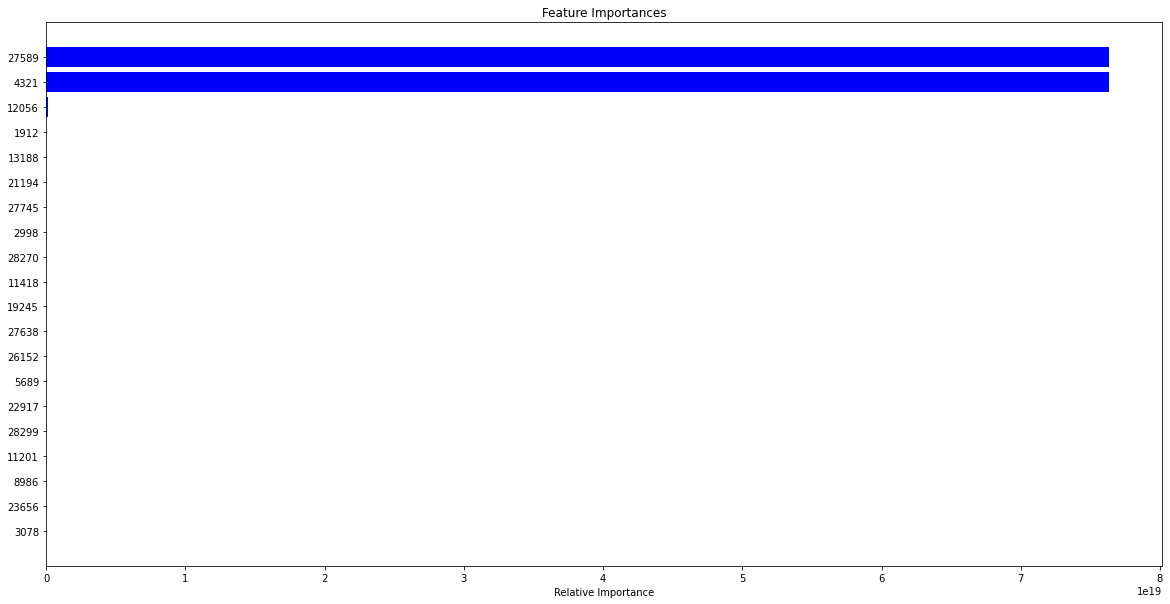

In [45]:
indices = np.argsort(scores)[-20:]  # top 20 features
plt.figure(figsize=(20,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)),scores[indices], color='b', align='center')
plt.yticks(range(len(indices)), [B16172_test.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [46]:
def_mutations = [22028,22029.22030,23402,23403,23404,28143,28144,28145,25468,25469,25470,23603,23604,23605,14381,14382,14383,26766,26767,26768,16439,16440,
16441,28880,28881,28882,21617,21618,21619,29402,29403,29404,15425,15426,15427,22994,22995,22996,28460,28461,28462,22916,22917,22918,24410,
24411,24412,27751,27752,27753,27637,27638,27639,10028,10029,10030,11201,11202,11203,19193,19194,19195,4181,4182,4183,9053,9054,9055,28916,
28917,28918,27873,27874,27875,6401,6402,6403,7124,7125,7126]
fea_name = []
sel_fea = list(pd.Series(scores).sort_values(ascending=False).index[:])
for i in sel_fea:
    fea_name.append(list(B16172_test.columns)[i])
rank_def = []
sel_def = []
for i in range(len(fea_name)):
    if int(fea_name[i]) in def_mutations:
        rank_def.append(i)
        sel_def.append(fea_name[i])
rank_def

[11,
 14,
 16,
 34,
 35,
 36,
 51,
 60,
 63,
 72,
 78,
 329,
 338,
 354,
 357,
 373,
 397,
 400,
 402,
 416,
 420,
 421]

In [47]:
sel_def

['27638',
 '22917',
 '11201',
 '26767',
 '6402',
 '21618',
 '23604',
 '28461',
 '4181',
 '29402',
 '22028',
 '27874',
 '28881',
 '24410',
 '27752',
 '25469',
 '7124',
 '28916',
 '9053',
 '10029',
 '22995',
 '23403']

In [23]:
B16172_SEL = np.array(B16172_test.iloc[:,:])[:,list(np.where( scores > 1.0e+7)[0])]
Kmeans = KMeans(n_clusters=1)
Kmeans.fit(B16172_SEL)
Kmeans.inertia_

C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  "KMeans is known to have a memory leak on Windows "


23608.538223140516

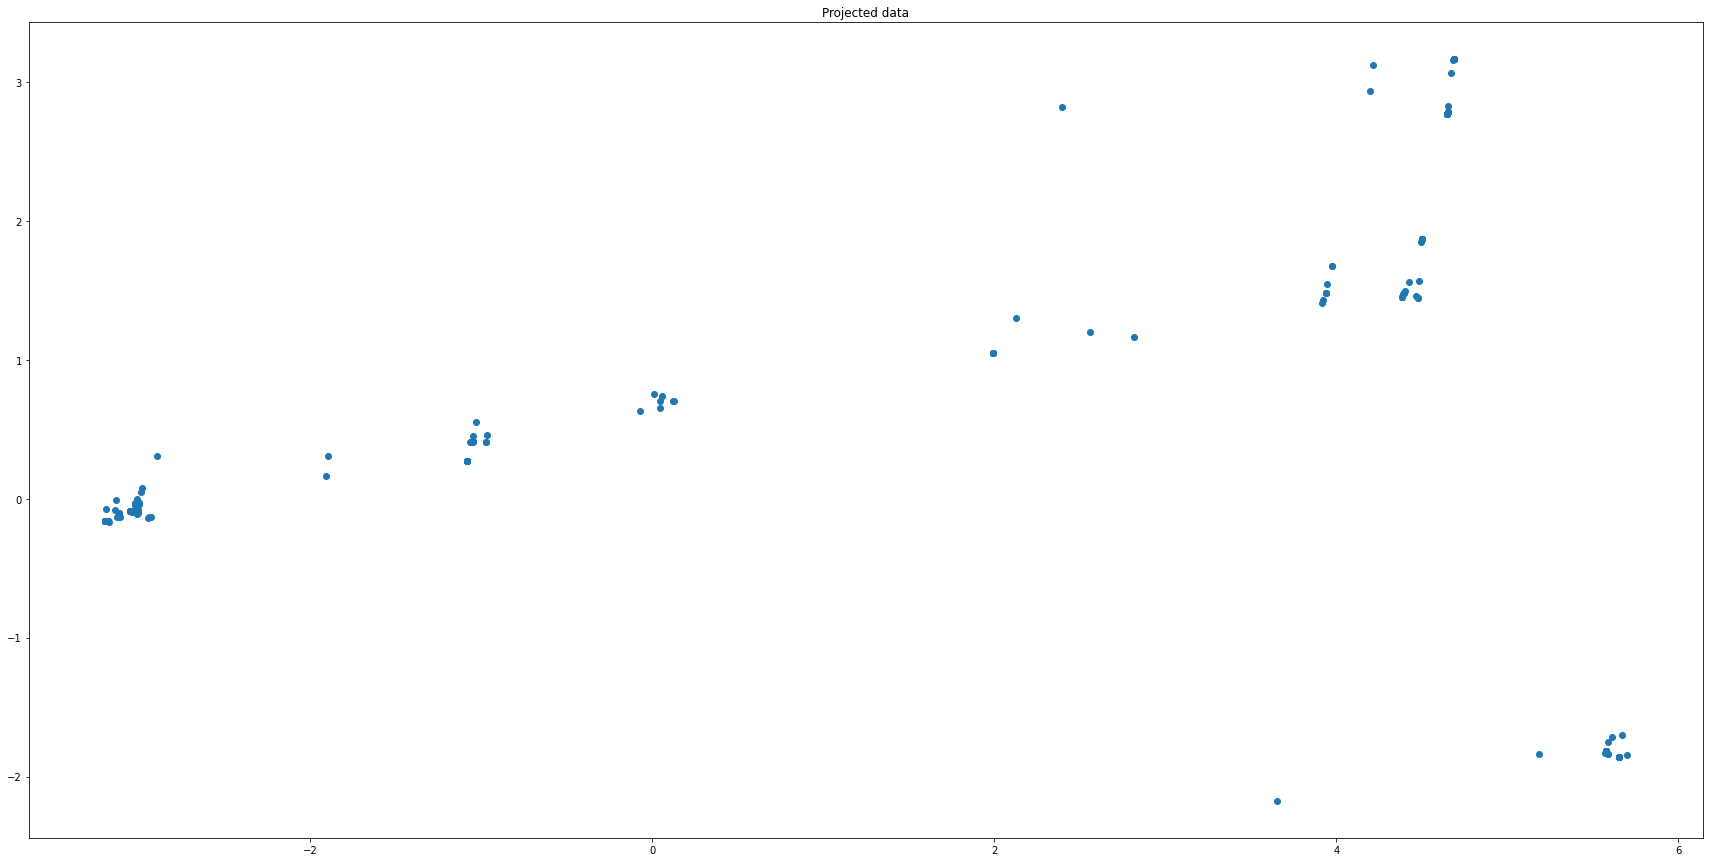

In [24]:
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(B16172_SEL[:,:-1])

# Project data onto first two principal components
projX = pca.transform(B16172_SEL[:,:-1])
plt.figure(figsize=(30,15))

scatter = plt.scatter(projX[:,0],projX[:,1],cmap='rainbow')

plt.title('Projected data')
plt.show()

In [26]:
ls =LaplacianScore(np.array(B16172_test.iloc[:,:]))
B16172_SEL = np.array(B16172_test.iloc[:,:])[:,list(np.where( ls < 0.001)[0])]
B16172_score = {}
for i in range(len(B16172_test.columns)):
    
    if str(list(ls)[i]) != 'nan':
        B16172_score[list(B16172_test.columns)[i]] = list(ls)[i]
res = sorted(B16172_score.items(),key = lambda item:item[1],reverse=False)
sor_res = {str(k):v for k,v in res}
sor_res

C:\Users\Aral\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide


{'18905': -10.923605699609698,
 '2969': -0.7166422945658393,
 '20641': -0.544628681667829,
 '5931': -0.005120105656847968,
 '20930': -0.0005696369668344014,
 '745': -1.2376794797788315e-15,
 '6730': -1.2376794797788315e-15,
 '15906': -1.2376794797788315e-15,
 '25471': -1.2376794797788315e-15,
 '3393': -2.0816709667737015e-16,
 '20268': -1.2496305997565019e-16,
 '5513': -1.1077976737772125e-16,
 '20368': -1.1077976737772125e-16,
 '2165': -6.273280833872533e-17,
 '16070': -3.952372522581998e-17,
 '11606': -3.075010217388053e-17,
 '29095': -3.075010217388053e-17,
 '2944': -2.6280712553617486e-17,
 '27566': -2.6280712553617486e-17,
 '27629': -2.6280712553617486e-17,
 '19441': -2.5190474241074027e-17,
 '19690': -2.5190474241074027e-17,
 '23695': -2.0948150038687477e-17,
 '21255': -1.0108596923862922e-17,
 '28899': -1.0108596923862922e-17,
 '28903': -1.0108596923862922e-17,
 '29705': -1.0108596923862922e-17,
 '10376': -2.2879985518679963e-18,
 '27281': -7.678985540964571e-22,
 '9130': -7.678

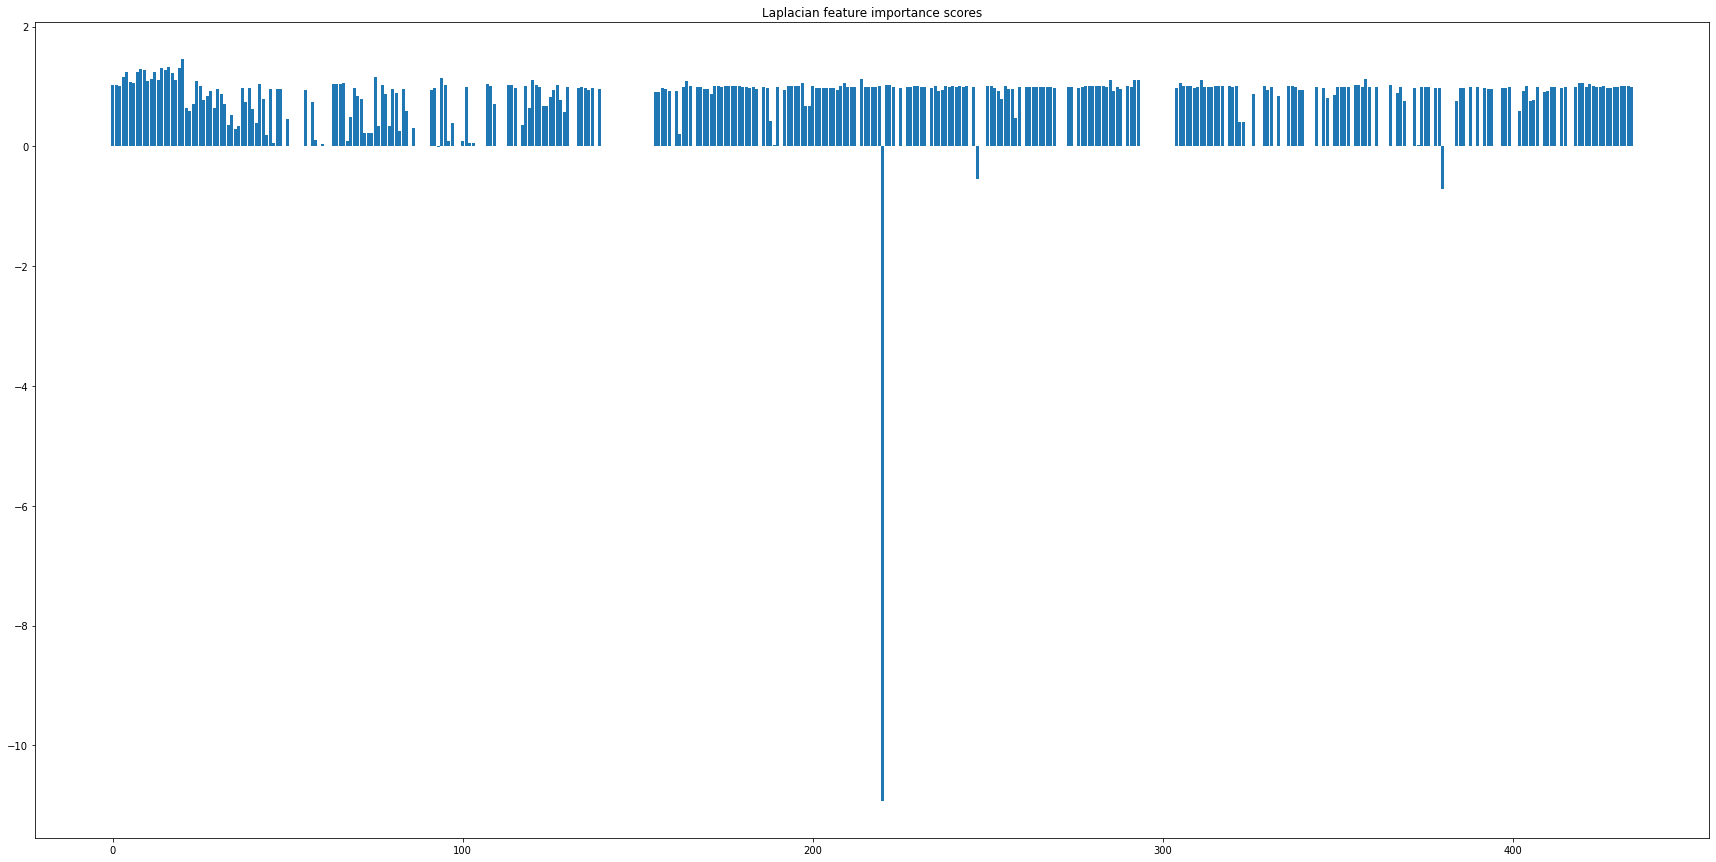

In [30]:
plt.figure(figsize=(30,15))
plt.title('Laplacian feature importance scores')
plt.bar(np.arange(np.array(B16172_test).shape[1]),ls);

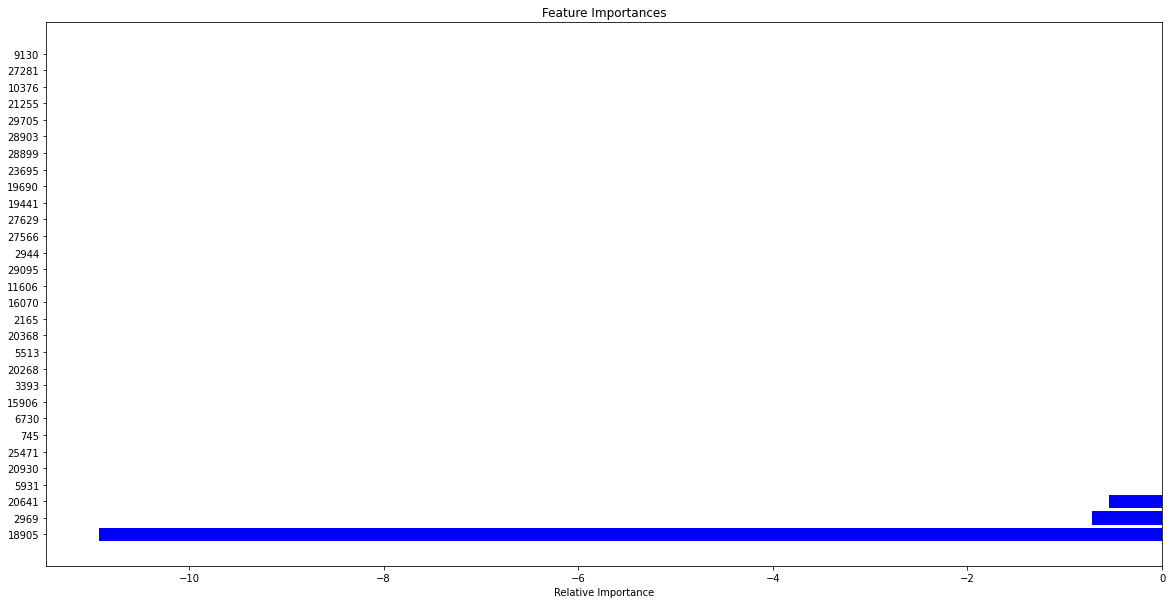

In [33]:
indices = np.argsort(ls)[:30]  # top 30 features
plt.figure(figsize=(20,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)),ls[indices], color='b', align='center')
plt.yticks(range(len(indices)), [B16172_test.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [27]:
rank_def = []
sel_def = []
for i in range(len(list(sor_res.keys()))):
    if int(list(sor_res.keys())[i]) in def_mutations:
        rank_def.append(i)
        sel_def.append(list(sor_res.keys())[i])
rank_def

[144,
 145,
 161,
 169,
 180,
 204,
 362,
 371,
 390,
 405,
 407,
 408,
 414,
 415,
 416,
 417,
 426,
 427,
 428,
 429,
 432,
 433]

In [28]:
sel_def

['10029',
 '4181',
 '9053',
 '27874',
 '28916',
 '7124',
 '6402',
 '23403',
 '28461',
 '26767',
 '22917',
 '11201',
 '29402',
 '24410',
 '22995',
 '23604',
 '28881',
 '25469',
 '27752',
 '27638',
 '21618',
 '22028']